# Market Manipulation Simulation Analysis

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

## Summary

In [67]:
summary_log_file = "../log/1645911990/summary_log.bz2"
summary = pd.read_pickle(summary_log_file)
summary

,AgentID,AgentStrategy,EventType,Event
0,1,ValueAgent,STARTING_CASH,10000000.0
1,2,ValueAgent,STARTING_CASH,10000000.0
2,3,ValueAgent,STARTING_CASH,10000000.0
3,4,ValueAgent,STARTING_CASH,10000000.0
4,5,ValueAgent,STARTING_CASH,10000000.0
...,...,...,...,...
20676,5176,HeuristicBeliefLearningAgent,ENDING_CASH,9987100.0
20677,5176,HeuristicBeliefLearningAgent,FINAL_VALUATION,-19737671.0
20678,5177,HeuristicBeliefLearningAgent,FINAL_CASH_POSITION,10028600.0
20679,5177,HeuristicBeliefLearningAgent,ENDING_CASH,10028600.0


In [46]:
summary['EventType'].unique()

array(['STARTING_CASH', 'FINAL_CASH_POSITION', 'ENDING_CASH',
       'FINAL_VALUATION'], dtype=object)

In [14]:
summary[summary['AgentID'] == 42]

,AgentID,AgentStrategy,EventType,Event
41,42,ValueAgent,STARTING_CASH,1.000000e+07
5300,42,ValueAgent,FINAL_CASH_POSITION,5.723069e+07
5301,42,ValueAgent,ENDING_CASH,1.015631e+07
5302,42,ValueAgent,FINAL_VALUATION,4.673363e+00


## Fundamental Price

In [13]:
fundamental_log_file = "../log/1645911990/fundamental_BUM.bz2"
fundamental = pd.read_pickle(fundamental_log_file)
fundamental

,FundamentalValue
FundamentalTime,
2022-02-26 09:30:00.000000000,100000.0
2022-02-26 09:30:00.000385220,100000.0
2022-02-26 09:30:00.000487856,100000.0
2022-02-26 09:30:00.000614774,100000.0
2022-02-26 09:30:00.000646944,100000.0
...,...
2022-02-26 11:29:59.383420900,99412.0
2022-02-26 11:29:59.402731229,99412.0
2022-02-26 11:29:59.689736608,99409.0


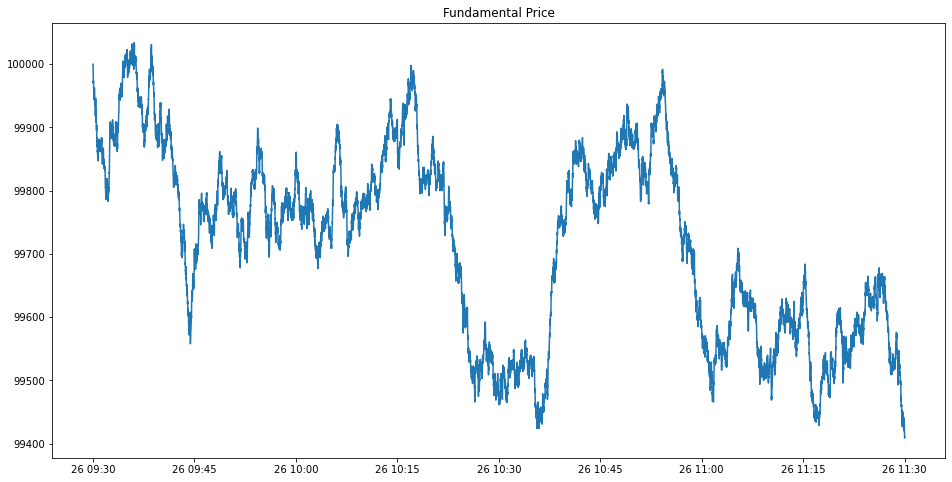

In [34]:
fig = plt.figure(figsize=(16, 8))
plt.plot(fundamental['FundamentalValue'])
plt.title('Fundamental Price') 
plt.show()

## Exchange

In [36]:
exchange_log_file = "../log/1645911990/EXCHANGE_AGENT.bz2"
exchange = pd.read_pickle(exchange_log_file)
exchange

,EventType,Event
EventTime,,
NaT,AGENT_TYPE,ExchangeAgent
2022-02-26 00:00:00.000000910,WHEN_MKT_OPEN,4458
2022-02-26 00:00:00.000000910,WHEN_MKT_CLOSE,4458
2022-02-26 00:00:00.000002233,WHEN_MKT_OPEN,4309
2022-02-26 00:00:00.000002233,WHEN_MKT_CLOSE,4309
...,...,...
2022-02-26 11:30:46.504507068,QUERY_SPREAD,1506
2022-02-26 11:30:47.898621979,QUERY_ORDER_STREAM,5085
2022-02-26 11:30:47.905858168,QUERY_SPREAD,28


In [40]:
exchange['EventType'].unique()

array(['AGENT_TYPE', 'WHEN_MKT_OPEN', 'WHEN_MKT_CLOSE', 'QUERY_SPREAD',
       'QUERY_ORDER_STREAM', 'LIMIT_ORDER', 'ORDER_ACCEPTED', 'BEST_BID',
       'BEST_ASK', 'ORDER_EXECUTED', 'LAST_TRADE', 'CANCEL_ORDER',
       'ORDER_CANCELLED', 'QUERY_TRANSACTED_VOLUME'], dtype=object)

In [44]:
exchange[exchange['EventType'] == 'CANCEL_ORDER']

,EventType,Event
EventTime,,
2022-02-26 09:30:00.761486301,CANCEL_ORDER,"{'agent_id': 27, 'time_placed': '2022-02-26T09..."
2022-02-26 09:30:01.751676651,CANCEL_ORDER,"{'agent_id': 36, 'time_placed': '2022-02-26T09..."
2022-02-26 09:30:01.880105781,CANCEL_ORDER,"{'agent_id': 32, 'time_placed': '2022-02-26T09..."
2022-02-26 09:30:02.069837635,CANCEL_ORDER,"{'agent_id': 24, 'time_placed': '2022-02-26T09..."
2022-02-26 09:30:02.236441453,CANCEL_ORDER,"{'agent_id': 24, 'time_placed': '2022-02-26T09..."
...,...,...
2022-02-26 11:29:58.187576801,CANCEL_ORDER,"{'agent_id': 47, 'time_placed': '2022-02-26T11..."
2022-02-26 11:29:58.597906508,CANCEL_ORDER,"{'agent_id': 27, 'time_placed': '2022-02-26T11..."
2022-02-26 11:29:59.342105891,CANCEL_ORDER,"{'agent_id': 50, 'time_placed': '2022-02-26T11..."


## Orderbook

In [48]:
orderbook_log_file = "../log/1645911990/ORDERBOOK_BUM_FULL.bz2"
orderbook = pd.read_pickle(orderbook_log_file)
orderbook

,97581,97787,97993,98157,98199,98297,98335,98405,98428,98453,...,100862,100870,100918,100992,101040,101114,101124,101218,101330,101396
QuoteTime,,,,,,,,,,,,,,,,,,,,,
2022-02-26 09:30:00.000481542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000731765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000768471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000970124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000970413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26 11:29:58.610906194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 11:29:59.347670847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 11:29:59.410089265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from util.formatting.convert_order_book import process_orderbook
processed_orderbook = process_orderbook(orderbook, 1)
processed_orderbook

Processing order book: 100%|██████████████| 40789/40789 [00:10<00:00, 3904.63it/s]


,ask_price_1,ask_size_1,bid_price_1,bid_size_1
0,1.000000e+10,1.000000e+10,99919.0,100.0
1,1.000600e+05,4.200000e+01,99919.0,100.0
2,1.000600e+05,4.200000e+01,99996.0,100.0
3,1.000600e+05,4.200000e+01,99996.0,100.0
4,1.000600e+05,4.200000e+01,99996.0,100.0
...,...,...,...,...
40784,9.952500e+04,2.200000e+01,99523.0,58.0
40785,9.952500e+04,2.200000e+01,99523.0,106.0
40786,9.952400e+04,3.200000e+01,99523.0,106.0
40787,9.952400e+04,3.200000e+01,99523.0,10.0


In [95]:
mid_price = (processed_orderbook['ask_price_1'] + processed_orderbook['bid_price_1']) / 2
mid_price.index = orderbook.index

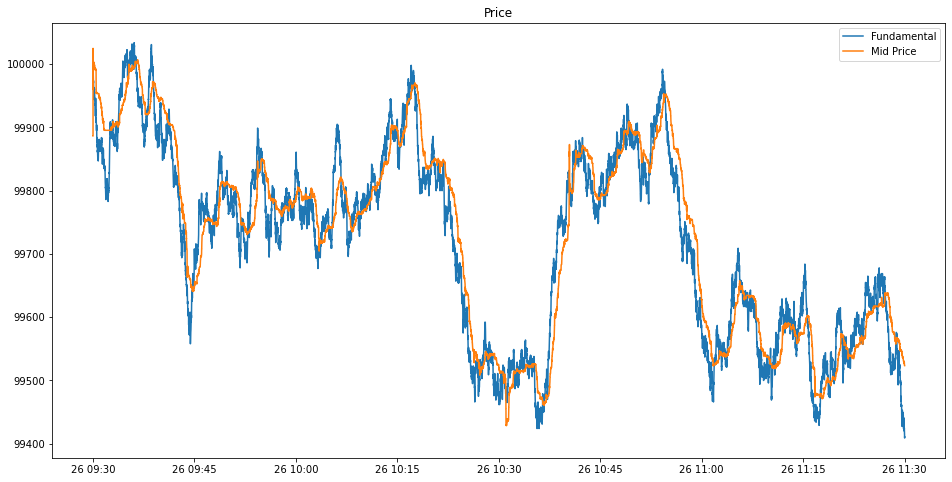

In [97]:
fig = plt.figure(figsize=(16, 8))
plt.plot(fundamental['FundamentalValue'], label="Fundamental")
plt.plot(mid_price[750:], label="Mid Price")
plt.legend()
plt.title('Price') 
plt.show()